### Import dos Pacotes

In [1]:
import pandas as pd
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

### Import dos dados

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
# colunas
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
# primeiras linhas
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# formato dos dados
df.shape

(8124, 23)

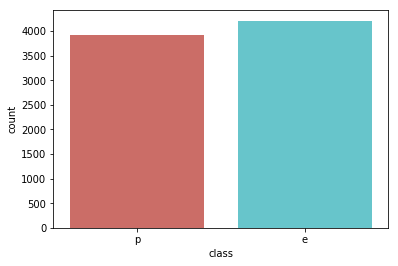

In [6]:
# Quantas classes temos?
sb.countplot(x='class',data=df, palette='hls')

Trata-se de um problema de classificação binária, sem grande desbalanceamento. Segundo o descritivo dos dados, 'p' são os cogumelos venenosos e 'e' são os cogumelos comestíveis.

In [7]:
# verificando por NAs
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Não há dados faltantes

### Analisando as variáveis categóricas

In [8]:
# analisando o tipo de dado
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Aparentemente temos todos os dados categóricos.

In [9]:
# analisando a quantidade de valores únicos por coluna:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [10]:
# vemos que a coluna veil-type tem somente um valor para todas as entradas. Confirmando:
df['veil-type'].drop_duplicates()

0    p
Name: veil-type, dtype: object

In [11]:
# Sabemos então que podemos excluir esta variável. Portanto:
df.drop(columns='veil-type', inplace=True)

### Tratando as variáveis categóricas

In [12]:
cols = list(df.columns)

In [13]:
df = pd.get_dummies(df, columns=cols[1:], 
                    prefix=cols[1:], drop_first=True)

### Análise de Correlação

Sabe-se que o Naive Bayes parte de premissa de que **não existe** correlação entre as variáveis. Portanto, é importante analisar a possível correlação entre os dados e eventualmente excluir variáveis muito correlatas.

In [14]:
df.iloc[:,1:].corr()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_c,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,0.249631,-0.015038,0.015893,-0.001638,-0.010562,...,-0.005051,-0.009456,-0.022075,-0.011469,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,-0.006285,-0.093397,0.029076,-0.003687,0.009128,...,-0.181191,-0.075804,0.034625,0.111346,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,0.010863,0.137988,0.015261,0.041662,0.162657,...,0.013599,-0.089360,0.172707,-0.170081,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
cap-shape_s,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,-0.001396,-0.042607,-0.051272,-0.004641,-0.029925,...,-0.014311,-0.026791,0.000341,0.044603,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784
cap-shape_x,-0.020077,-0.720235,-0.304733,-0.056884,1.000000,-0.020077,-0.040634,-0.019137,-0.012814,-0.050400,...,-0.004586,0.059264,-0.060421,0.044626,0.023197,-0.096639,-0.004529,-0.029042,0.002845,-0.036493
cap-surface_g,0.249631,-0.006285,0.010863,-0.001396,-0.020077,1.000000,-0.015038,-0.018096,-0.001638,-0.010562,...,-0.005051,-0.009456,-0.022075,-0.011469,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-surface_s,-0.015038,-0.093397,0.137988,-0.042607,-0.040634,-0.015038,1.000000,-0.552410,-0.035551,-0.010886,...,0.090846,0.187716,0.019574,-0.339696,0.123932,0.190799,0.077081,-0.039574,0.117548,0.062109
cap-surface_y,0.015893,0.029076,0.015261,-0.051272,-0.019137,-0.018096,-0.552410,1.000000,0.035718,0.101720,...,-0.036852,-0.146611,0.089870,0.128418,-0.191326,-0.006819,0.039697,0.117915,-0.100248,0.031986
cap-color_c,-0.001638,-0.003687,0.041662,-0.004641,-0.012814,-0.001638,-0.035551,0.035718,1.000000,-0.035116,...,-0.016793,-0.031438,0.020526,-0.021681,-0.044242,0.107833,-0.014249,0.008698,-0.016074,-0.011481
cap-color_e,-0.010562,0.009128,0.162657,-0.029925,-0.050400,-0.010562,-0.010886,0.101720,-0.035116,1.000000,...,-0.108291,-0.202733,0.257646,-0.021859,-0.285297,0.140610,-0.091884,0.070022,-0.103655,0.026209


Observamos que **não há** variáveis altamente correlacionadas nos dados. Portanto, não é necessário tratamento acidicional nesta etapa.

### Segregando em Treino e Teste

In [22]:
# Features
X = df.iloc[:,1:].values

# Target
y = df.iloc[:,0].values

# Dividindo em Treino e Teste (80~20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

### Treinando e avaliando o modelo

In [29]:
#classificador Naive Bayes Gaussiano
classificador = GaussianNB()

# medindo o tempo de execução
%timeit classificador.fit(X_train, y_train)

15.1 ms ± 757 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
y_pred = classificador.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      0.89      0.94       843
           p       0.89      1.00      0.94       782

    accuracy                           0.94      1625
   macro avg       0.95      0.94      0.94      1625
weighted avg       0.95      0.94      0.94      1625

0.940923076923077


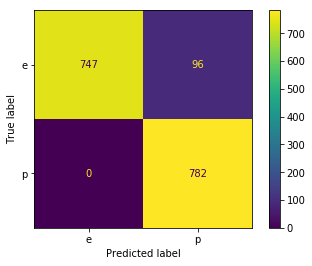

In [27]:
plot_confusion_matrix(classificador, X_test, y_test)

Avaliando o resultado final, vemos que a **precisão** do modelo atingiu 95%. A acurácia e o *recall* atingiram 94%. 

Este resultado foi obtido com um treinamento de apenas 15 milissegundos do modelo. Como esperado, este modelo é realmente rápido, considerando os dados de treinamento de cerca de 6.500 registros.